In [51]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.ticker import MultipleLocator



In [52]:
datasets = {
    "cifar10": {
        "known_class": ['_resnet18', '_resnet34', '_resnet50',
                        '_vgg16'],
        "batch": [400]
    },
    "cifar100": {
        "known_class": ['_resnet18', '_resnet34', '_resnet50',
                        '_vgg16'],
        "batch": [400]
    }
}

def load_pkl_files_new(dataset_name, known_class, batch_size=None):
	active_method_1='_active_query'
	active_method_2='_AV_temperature'
	pkl_files = {active_method_1+known_class: []}
	log_al_folder = 'log_AL/'
	for file in os.listdir(log_al_folder):
		if file.endswith('.pkl') and f"{dataset_name}_" in file and known_class in file and active_method_1 in file:
			if batch_size is not None and f"batch{batch_size}_" not in file:
				continue
			if known_class == '_pretrained_model_clip':
				if '_neighbor_10' not in file:
					continue
			if "_per_round_query_index" in file:
				continue
			if known_class == "_resnet18" and 'pretrained_model_clip_neighbor_10' not in file:
				continue
			pkl_files[active_method_1+known_class].append(os.path.join(log_al_folder, file))

	pkl_files[active_method_2 + known_class] = []
	for file in os.listdir(log_al_folder):
		if file.endswith('.pkl') and f"{dataset_name}_" in file and known_class in file and active_method_2 in file:
			if batch_size is not None and f"batch{batch_size}_" not in file:
				continue
			if known_class == '_pretrained_model_clip':
				if '_neighbor_10' not in file:
					continue
			if "_per_round_query_index" in file:
				continue
			if "hybrid" not in file:
				continue
			pkl_files[active_method_2 + known_class].append(os.path.join(log_al_folder, file))

	return pkl_files


def load_pkl_files(active_method, dataset_name, known_class, batch_size=None):
    pkl_files = {known_class: []}
    #active_method = "active_query"
    log_al_folder = 'log_AL/'
    for file in os.listdir(log_al_folder):
        if file.endswith('.pkl') and f"{dataset_name}_" in file and known_class in file and active_method in file:
            if batch_size is not None and f"batch{batch_size}_" not in file:
                continue
            if known_class == '_pretrained_model_clip':
                if '_neighbor_10' not in file:
                    continue
            if "_per_round_query_index" in file:
                continue
            if known_class == "_resnet18" and 'pretrained_model_clip_neighbor_10' not in file:
                continue
            pkl_files[known_class].append(os.path.join(log_al_folder, file))
    return pkl_files

In [53]:
def plot_graphs(p_index, method_index, group_name, acc_list, precision_list, recall_list, acc_std_list, precision_std_list, recall_std_list, batch_size, method_colors, fig_acc, ax_acc, fig_prec, ax_prec, fig_recall, ax_recall, counter):


    dataset_name_map = {"Tiny-Imagenet": "Tiny-Imagenet",
                        "cifar10": "CIFAR10",
                        "cifar100": "CIFAR100"}

    # Define widths for each model type
    width_map = {}
    for dataset_name in datasets:
        for item in datasets[dataset_name]['known_class']:
            if item not in width_map:
                width_map[item] = 1
                if '_pretrained_model_clip' in item:
                    width_map[item] = 2

    # Accuracy plot
    query_numbers = list(range(len(acc_list[0])))

    #fig, ax = plt.subplots(figsize=(7.5, 6))
    for i, (acc, acc_std) in enumerate(zip(acc_list, acc_std_list)):
        label = list(method_colors.keys())[i]
        if method_index == 0:
            ax_acc.plot(query_numbers, acc, label=label, color=method_colors[p_index], linewidth=width_map[label])
        else:
            ax_acc.plot(query_numbers, acc, label=label, color=method_colors[p_index], linewidth=width_map[label], linestyle='dashed')
        
        ax_acc.fill_between(query_numbers, np.array(acc) - 0.8 * np.array(acc_std), np.array(acc) + 0.8 * np.array(acc_std),
                        alpha=0.2, color=method_colors[p_index])

    # Add a legend

    if counter == 3:
        for tick in ax_acc.get_yticks():
            ax_acc.axhline(tick, linestyle='dashed', alpha=0.2, color='red')

        ax_acc.xaxis.set_ticks(range(len(query_numbers)))
        for tick in ax_acc.get_xticks():
            ax_acc.axvline(tick, linestyle='dashed', alpha=0.2, color='red')

    ax_acc.set_xlabel('Query Round', fontsize=22)
    ax_acc.set_ylabel('Accuracy (%)', fontsize=22)
    ax_acc.set_title(f'{dataset_name_map[group_name.split()[0]]}    Batch Size: {batch_size}', fontsize=22)
    ax_acc.tick_params(axis='both', which='major', labelsize=18)
    ax_acc.set_ylim([0, 100])


    
    # plt.savefig(f'image/{group_name.split()[0]} Batch {batch_size} pretrained acc.png', format='png', dpi=300)
    #plt.show()

    
    
    
    # Precision plot
    #fig, ax = plt.subplots(figsize=(7.5, 6))
    for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
        label = list(method_colors.keys())[i]
        
        if method_index == 0:
            
            ax_prec.plot(query_numbers, np.array(precision) * 100, label=label, color=method_colors[p_index],
                    linewidth=width_map[label])
        else:
            
            ax_prec.plot(query_numbers, np.array(precision) * 100, label=label, color=method_colors[p_index],
                    linewidth=width_map[label], linestyle='dashed')          
    
    
    
    ax_prec.fill_between(query_numbers, (np.array(precision) - 0.8 * np.array(precision_std)) * 100,
                        (np.array(precision) + 0.8 * np.array(precision_std)) * 100, alpha=0.2,
                        color=method_colors[p_index])

    # Add legend to the plot


    if counter == 3:
        for tick in ax_prec.get_yticks():
            ax_prec.axhline(tick, linestyle='dashed', alpha=0.2, color='blue')

        ax_prec.xaxis.set_ticks(range(len(query_numbers)))

        for tick in ax_prec.get_xticks():
            ax_prec.axvline(tick, linestyle='dashed', alpha=0.2, color='blue')

    ax_prec.set_xlabel('Query Round', fontsize=22)
    ax_prec.set_ylabel('Precision (%)', fontsize=22)
    ax_prec.set_title(f'{dataset_name_map[group_name.split()[0]]}    Batch Size: {batch_size}', fontsize=22)
    ax_prec.tick_params(axis='both', which='major', labelsize=18)
    ax_prec.set_ylim([0, 100])

    if group_name == "Tiny-Imagenet":
        # Create an inset axis

        ax_inset = inset_axes(ax_prec, width="40%", height="40%", loc='upper left', borderpad=3)
        half_length = len(query_numbers) // 2
        for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
            label = list(method_colors.keys())[i]
            ax_inset.plot(query_numbers[half_length:], np.array(precision[half_length:]) * 100, label=label,
                              color=method_colors[label], linewidth=width_map[label])
            ax_inset.fill_between(query_numbers[half_length:], (
                            np.array(precision[half_length:]) - 0.8 * np.array(precision_std[half_length:])) * 100, (
                                                  np.array(precision[half_length:]) + 0.8 * np.array(
                                              precision_std[half_length:])) * 100, alpha=0.2,
                                      color=method_colors[label])

        ax_inset.set_xlim(6.0, query_numbers[-1])  # Set x-axis from 6.0 to the end
        ax_inset.set_ylim(78, 90)  # Set y-axis range from 70 to 90
        ax_inset.xaxis.set_ticklabels([])  # Remove x-axis numbers
        ax_inset.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax_inset.yaxis.set_major_locator(MultipleLocator(4))
        ax_inset.tick_params(axis='both', which='major', labelsize=16)
        # ax_inset.yaxis.set_ticklabels([])  # Remove x-axis numbers
        # ax_inset.set_xlabel('Query Numbers')
        # ax_inset.set_ylabel('Precision (%)')
        # Make tick marks invisible
        for tic in ax_inset.xaxis.get_major_ticks() + ax_inset.yaxis.get_major_ticks():
            tic.tick1line.set_visible(False)
            tic.tick2line.set_visible(False)

    
    # plt.savefig(f'image/{group_name.split()[0]} Batch {batch_size} pretrained precision.png', format='png', dpi=300)
   

    # Recall plot
    #fig, ax = plt.subplots(figsize=(7.5, 6))
    for i, (recall, recall_std) in enumerate(zip(recall_list, recall_std_list)):
        label = list(method_colors.keys())[i]
        
        if method_index == 0:
            
            ax_recall.plot(query_numbers, np.array(recall) * 100, label=label, color=method_colors[p_index],
                    linewidth=width_map[label])
        else:

            ax_recall.plot(query_numbers, np.array(recall) * 100, label=label, color=method_colors[p_index],
                    linewidth=width_map[label], linestyle='dashed')
        
        
        ax_recall.fill_between(query_numbers, (np.array(recall) - 0.8 * np.array(recall_std)) * 100,
                        (np.array(recall) + 0.8 * np.array(recall_std)) * 100, alpha=0.2, color=method_colors[p_index])

    # Add legend to the plot

    if counter == 3:

        for tick in ax_recall.get_yticks():
            ax_recall.axhline(tick, linestyle='dashed', alpha=0.2, color='green')

        ax_recall.xaxis.set_ticks(range(len(query_numbers)))
        for tick in ax_recall.get_xticks():
            ax_recall.axvline(tick, linestyle='dashed', alpha=0.2, color='green')

    ax_recall.set_xlabel('Query Round', fontsize=22)
    ax_recall.set_ylabel('Recall (%)', fontsize=22)
    ax_recall.set_title(f'{dataset_name_map[group_name.split()[0]]}    Batch Size: {batch_size}', fontsize=22)
    ax_recall.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax_recall.tick_params(axis='both', which='major', labelsize=18)
    ax_recall.set_ylim([0, 100])
    # plt.savefig(f'image/{group_name.split()[0]} Batch {batch_size} pretrained recall.png', format='png', dpi=300)
    #plt.show()

{'_resnet18': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), '_resnet34': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), '_resnet50': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), '_vgg16': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)}
_resnet18
_resnet34
_resnet50
_vgg16
_resnet18
_resnet34
_resnet50
_vgg16


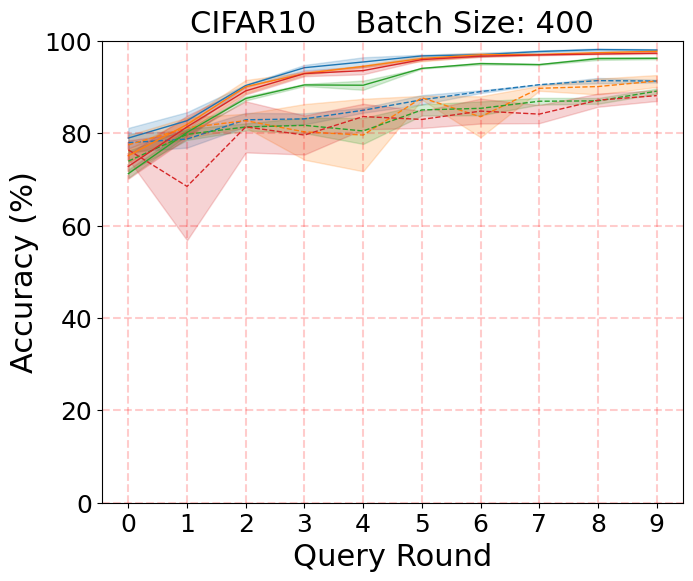

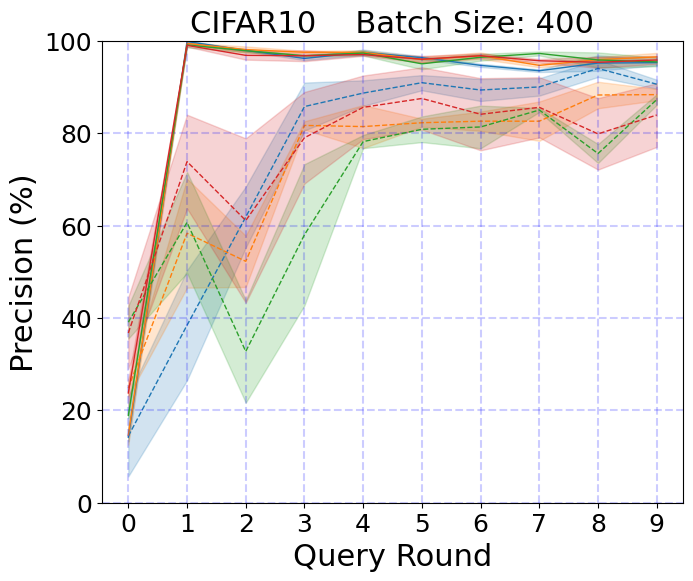

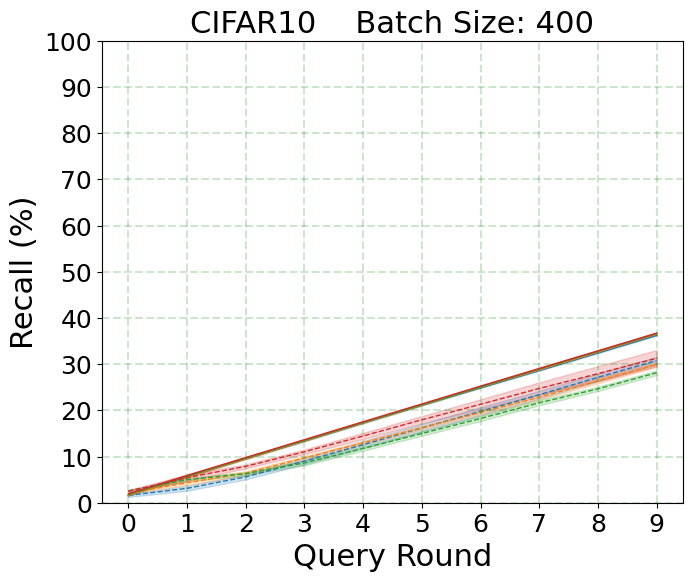

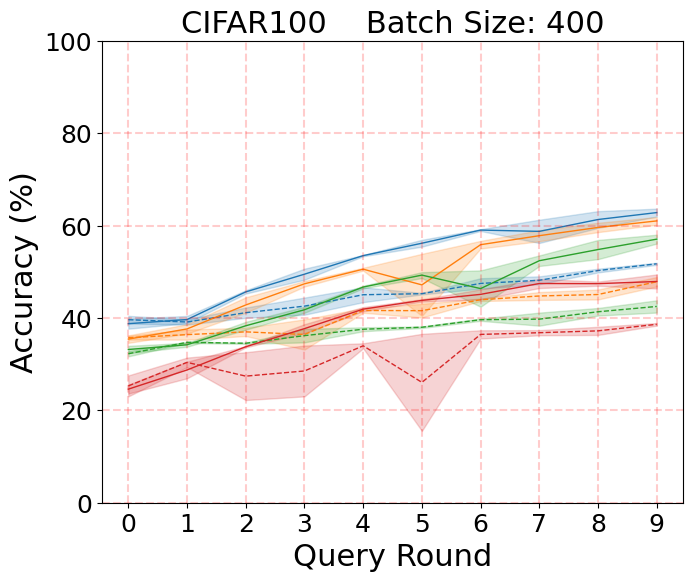

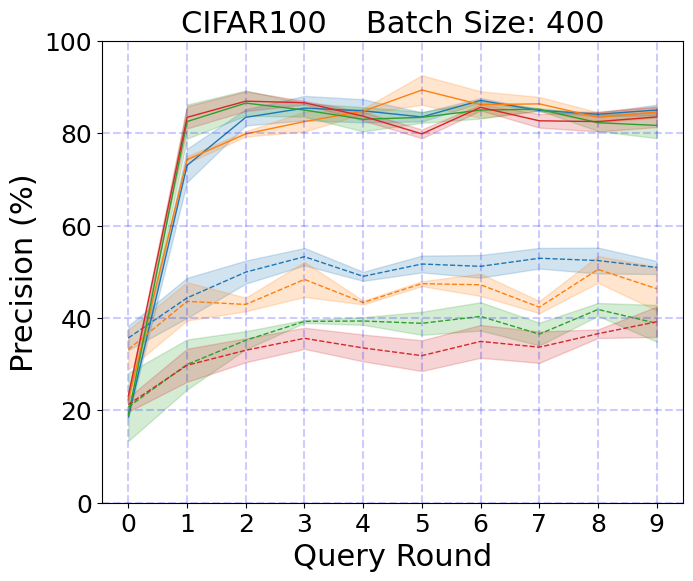

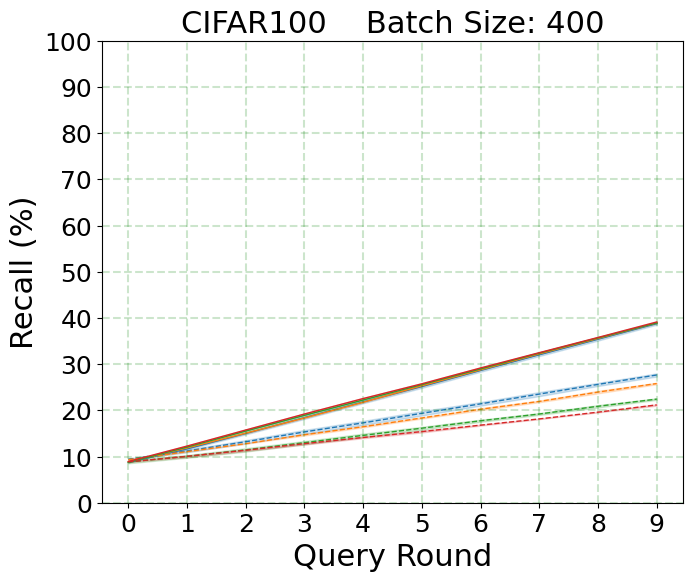

In [54]:

method_colors = {datasets[dataset_name]['known_class'][i]: plt.cm.tab10(i) for dataset_name in datasets for i in
             range(len(datasets[dataset_name]['known_class']))}
    
print (method_colors)
for dataset_name, dataset_info in datasets.items():

            
    fig_acc, ax_acc = plt.subplots(figsize=(7.5, 6))
    fig_prec, ax_prec = plt.subplots(figsize=(7.5, 6))
    fig_recall, ax_recall = plt.subplots(figsize=(7.5, 6))

    counter = 0
    for batch_size in dataset_info['batch']:

    
    
        for p_index, pretrained_model in enumerate(dataset_info['known_class']):
    
    
            all_acc_list, all_precision_list, all_recall_list = [], [], []
            all_acc_std_list, all_precision_std_list, all_recall_std_list = [], [], []
        
            print(pretrained_model)
            
            
            group_name = f"{dataset_name}_{pretrained_model}_Batch{batch_size}"
            
            #pkl_files_dict = load_pkl_files(active_method="active_query", dataset_name, pretrained_model, batch_size)
            
            #lfosa_pkl_files_dict = load_pkl_files(active_method="AV_temperature", dataset_name, pretrained_model, batch_size)
            
            
            pkl_files_dict = load_pkl_files_new(dataset_name, pretrained_model, batch_size)
            
      
            acc_list, precision_list, recall_list = [], [], []
            acc_std_list, precision_std_list, recall_std_list = [], [], []
        
            for method, files in pkl_files_dict.items():

                acc_list, precision_list, recall_list = [], [], []
                acc_std_list, precision_std_list, recall_std_list = [], [], []
                
                
                acc_vals, precision_vals, recall_vals = [], [], []
                for file in files:
                    with open(file, 'rb') as f:
                        data = pickle.load(f)
                        acc_vals.append([data['Acc'][i] for i in data['Acc']])
                        precision_vals.append([data['Precision'][i] for i in data['Precision']])
                        recall_vals.append([data['Recall'][i] for i in data['Recall']])

                if acc_vals:
                    num_seeds = len(files)
                    acc_avg = np.mean(acc_vals, axis=0).tolist()
                    precision_avg = np.mean(precision_vals, axis=0).tolist()
                    recall_avg = np.mean(recall_vals, axis=0).tolist()

                    acc_std = np.std(acc_vals, axis=0).tolist()
                    precision_std = np.std(precision_vals, axis=0).tolist()
                    recall_std = np.std(recall_vals, axis=0).tolist()

                    acc_list.append(acc_avg)
                    precision_list.append(precision_avg)
                    recall_list.append(recall_avg)

                    acc_std_list.append(acc_std)
                    precision_std_list.append(precision_std)
                    recall_std_list.append(recall_std)

                    # method_colors[pretrained_model] = plt.cm.tab10(len(method_colors))

                    
                all_acc_list.append(acc_list)
                all_precision_list.append(precision_list)
                all_recall_list.append(recall_list)


                all_acc_std_list.append(acc_std_list)
                all_precision_std_list.append(precision_std_list)
                all_recall_std_list.append(recall_std_list)
  


            for i in range(2):

                acc_list = all_acc_list[i]
                precision_list = all_precision_list[i]
                recall_list = all_recall_list[i]
                acc_std_list = all_acc_std_list[i]
                precision_std_list = all_precision_std_list[i]
                recall_std_list = all_recall_std_list[i]


                plot_graphs(pretrained_model, i, dataset_name, acc_list, precision_list, recall_list, acc_std_list, precision_std_list,
                            recall_std_list, batch_size, method_colors, fig_acc, ax_acc, fig_prec, ax_prec, fig_recall, ax_recall, counter)
                counter += 1



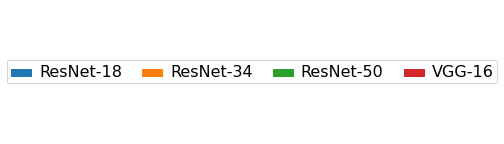

In [55]:
from matplotlib import patches
import matplotlib.pyplot as plt

from matplotlib import patches
import matplotlib.pyplot as plt


from matplotlib import patches
import matplotlib.pyplot as plt

def plot_legend(datasets):
    # Prepare a list of all known classes
    known_classes = [known_class for dataset in datasets.values() for known_class in dataset['known_class']]

    # Define colors for each known_class
    method_colors = {datasets[dataset_name]['known_class'][i]: plt.cm.tab10(i) for dataset_name in datasets for i in
                     range(len(datasets[dataset_name]['known_class']))}

    # Swap the color of 'Clip' with 'Image 50'
    # method_colors['_pretrained_model_clip'], method_colors['_pretrained_model_image50'] = method_colors['_pretrained_model_image50'], method_colors['_pretrained_model_clip']

    # Create labels mapping
    labels_map = {
        '_resnet18': 'ResNet-50',
        '_resnet34': 'ResNet-18',
        '_resnet50': 'ResNet-34',
        '_vgg16': 'VGG-16',
    }

    # Replace the labels
    known_class_labels = [labels_map.get(known_class, known_class) for known_class in known_classes]

    # Reorder legend elements
    desired_order = ['ResNet-18', 'ResNet-34', 'ResNet-50', 'VGG-16']
    other_methods = [method for method in known_class_labels if method not in desired_order]
    ordered_known_classes = desired_order + other_methods

    # Create a separate legend plot
    legend_elements = [patches.Patch(color=method_colors[known_class], label=label)
                       for known_class, label in zip(known_classes, ordered_known_classes)]

    fig, ax = plt.subplots(figsize=(7.6, 2.4))  # Adjust the figsize to 640x480 pixels
    legend = ax.legend(handles=legend_elements, loc='center', ncol=5, bbox_to_anchor=(0.5, 0.5))
    for text in legend.get_texts():
        text.set_fontsize(16)
    ax.axis('off')
    # plt.savefig(f'image/pretrained legend.png', format='png', dpi=300)
    plt.show()



plot_legend(datasets)



